## Spatial core and border?

In [1]:
# Import relevant libraries
import numpy as np
import scanpy as sc
import os
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
from collections import OrderedDict
from matplotlib import cm
import anndata as ann
import scanpy.external as sce
from datetime import datetime
import NaiveDE
import SpatialDE
from matplotlib_venn import venn3
%matplotlib inline
import glob
from sklearn.metrics import mean_squared_error as mse
from scipy import stats

# Set current directory
os.chdir("/Users/mendenlab/work/spatial_granuloma/scripts")

In [4]:
# Import adata (latest version)
adata_path = "../results/current/"
adata = sc.read(os.path.join(adata_path, "final/adata_deg.h5"))
adata

/Users/mendenlab/miniconda3/envs/r4.1.2_py3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 15777 × 15107
    obs: 'indexes', 'sample', 'project', 'slide', 'in_tissue', 'array_row', 'array_col', 'ANNOTATOR', 'DISEASE', 'disease', 'SAMPLE', 'LESIONAL', 'NON LESIONAL', 'upper EPIDERMIS', 'middle EPIDERMIS', 'basal EPIDERMIS', 'DERMIS', 'DERdepth1', 'DERdepth2', 'DERdepth3', 'DERdepth4', 'DERdepth5', 'DERdepth6', 'DERdepth7', 'INTERFACE', 'VESSEL', 'HAIR FOLLICLE', 'SWEAT GLAND', 'SEBACEOUS GLAND', 'MUSCLE', 'FAT TISSUE', 'KERATINOCYTE', 'ENDOTHELIAL', 'GRANULOMA', 'BIOBANK', 'SPECIMEN', 'GA', 'GNL', 'GSC', 'GSS', 'EPIDERMIS', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'library_id', 'batch', 'specimen', 'patient', 'biopsy_type', 'cell_type', 'tissue_type', 'skin_layer', 'spot_type', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'size_factors', 'leiden_r5', 'leiden_r3', 'leiden_r1.5', 'leiden_r1.3', 'leiden_r1.0', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.3', 'leiden_r5_patient', 'leiden_r3_patient', 'leiden_r1.5_patien

In [27]:
os.chdir("/Volumes/Drive/spatial_granuloma/output/SpatialDE/Granulomas_only") # Set working directory so it saves in the right folder
print(os.getcwd())

/Volumes/Drive/spatial_granuloma/output/SpatialDE/Granulomas_only


In [28]:
adata.obs

,indexes,sample,project,slide,in_tissue,array_row,array_col,ANNOTATOR,DISEASE,disease,...,dermis_lesvsnonles,ga_corevsborder,sa_corevsborder,ga_gvsd,sa_gvsd,nl_gvsd,manual_gvsd,leiden_gvsd,epivsdermis,epivsdermis_withoutinterface
0,AAACACCAATAACTGC,P17851_1001,P17851,V10J29-080-V1,1,59,19,S,granuloma annulare,granuloma annulare,...,dermis_nonlesional,other,other,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis
1,AAACAGTGTTCCTGGG,P17851_1001,P17851,V10J29-080-V1,1,73,43,S,granuloma annulare,granuloma annulare,...,other,other,other,other,other,other,other,other,epidermis,other
2,AAACATGGTGAGAGGA,P17851_1001,P17851,V10J29-080-V1,1,62,0,S,granuloma annulare,granuloma annulare,...,dermis_nonlesional,other,other,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis
3,AAACCGTTCGTCCAGG,P17851_1001,P17851,V10J29-080-V1,1,52,42,S,granuloma annulare,granuloma annulare,...,dermis_nonlesional,other,other,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis
4,AAACGAAGAACATACC,P17851_1001,P17851,V10J29-080-V1,1,6,64,S,granuloma annulare,granuloma annulare,...,other,other,other,other,other,other,other,other,epidermis,epidermis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15772,TTGTATCACACAGAAT,P18554_1008,P18554,V10M09-087-V4,1,12,74,S,sarcoidosis,sarcoidosis suspected,...,dermis_lesional,other,other,other,other,other,other,other,other,other
15773,TTGTGAACCTAATCCG,P18554_1008,P18554,V10M09-087-V4,1,56,90,S,sarcoidosis,sarcoidosis suspected,...,other,other,other,other,other,other,other,other,epidermis,epidermis
15774,TTGTGGCCCTGACAGT,P18554_1008,P18554,V10M09-087-V4,1,18,60,S,sarcoidosis,sarcoidosis suspected,...,other,other,sa_core,other,sa_granuloma,other,granuloma,leiden_granuloma,other,other
15775,TTGTTAGCAAATTCGA,P18554_1008,P18554,V10M09-087-V4,1,22,42,S,sarcoidosis,sarcoidosis suspected,...,dermis_nonlesional,other,other,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis,healthydermis


In [29]:
# Subset to only granuloma spots from Leiden clusters 3, 12, 13

adata2 = adata[(adata.obs['leiden_r1.3_patient'] == '3') | (adata.obs['leiden_r1.3_patient'] == '12') | (adata.obs['leiden_r1.3_patient'] == '13')].copy()
adata2.obs['leiden_r1.3_patient']

16        3
19        3
37       13
49       13
62       13
         ..
15724     3
15725     3
15739     3
15761    13
15774     3
Name: leiden_r1.3_patient, Length: 2557, dtype: category
Categories (3, object): ['3', '12', '13']

Trying to set attribute `._uns` of view, copying.


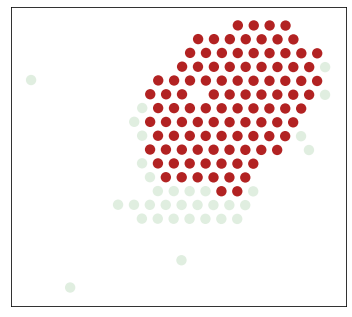

In [30]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
sc.pl.spatial(adata2[adata2.obs['sample_SPECIMEN']=='P18554_1001_50107-A'],
              library_id = 'P18554_1001', 
              ax = ax, title= '', 
              color = 'spot_type', show = False,
              palette = _set_colors(adata2[adata2.obs['sample_SPECIMEN']=='P18554_1001_50107-A'],
                                  'spot_type', spot_colors),
              legend_loc = 'None', # to remove the legend
              size = 1, img_key = None, alpha_img = 1, alpha = 1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.axis = 'off'

In [31]:
### NO BATCH CORRECTION
sc.pp.neighbors(adata2, key_added='neighbors_granuloma_uc', use_rep = 'X_pca_uc') # use uncorrected data
sc.tl.umap(adata2, neighbors_key='neighbors_granuloma_uc')

adata2.obsm['X_umap_granuloma_uc'] = adata2.obsm['X_umap'] # (no batch correction)

# Perform Leiden clustering with different resolution parameters (just normalisation and QC, no batch correction)
sc.tl.leiden(adata2, resolution=5,
             neighbors_key='neighbors_granuloma_uc',
             key_added='leiden_r5_g_uc')
sc.tl.leiden(adata2, resolution=3,
             neighbors_key='neighbors_granuloma_uc',
             key_added='leiden_r3_g_uc')
sc.tl.leiden(adata2, resolution=1.5,
             neighbors_key='neighbors_granuloma_uc',
             key_added='leiden_r1.5_g_uc')
sc.tl.leiden(adata2, resolution=1.3,
             neighbors_key='neighbors_granuloma_uc',
             key_added='leiden_r1.3_g_uc')
sc.tl.leiden(adata2, resolution=1.0,
             neighbors_key='neighbors_granuloma_uc',
             key_added='leiden_r1.0_g_uc')
sc.tl.leiden(adata2, resolution=0.8,
             neighbors_key='neighbors_granuloma_uc',
             key_added='leiden_r0.8_g_uc')
sc.tl.leiden(adata2, resolution=0.5,
             neighbors_key='neighbors_granuloma_uc',
             key_added='leiden_r0.5_g_uc')
sc.tl.leiden(adata2, resolution=0.3,
             neighbors_key='neighbors_granuloma_uc',
             key_added='leiden_r0.3_g_uc')

### WITH BATCH CORRECTION
sc.pp.neighbors(adata2, key_added='neighbors_granuloma_bc', use_rep = 'X_pca_cor_BIOBANK')
sc.tl.umap(adata2, neighbors_key='neighbors_granuloma_bc')
adata2.obsm['X_umap_granuloma_bc'] = adata2.obsm['X_umap'] # (batch correction)

# Perform Leiden clustering with different resolution parameters (just normalisation and QC, no batch correction)
sc.tl.leiden(adata2, resolution=5,
             neighbors_key='neighbors_granuloma_bc',
             key_added='leiden_r5_g_bc')
sc.tl.leiden(adata2, resolution=3,
             neighbors_key='neighbors_granuloma_bc',
             key_added='leiden_r3_g_bc')
sc.tl.leiden(adata2, resolution=1.5,
             neighbors_key='neighbors_granuloma_bc',
             key_added='leiden_r1.5_g_bc')
sc.tl.leiden(adata2, resolution=1.3,
             neighbors_key='neighbors_granuloma_bc',
             key_added='leiden_r1.3_g_bc')
sc.tl.leiden(adata2, resolution=1.0,
             neighbors_key='neighbors_granuloma_bc',
             key_added='leiden_r1.0_g_bc')
sc.tl.leiden(adata2, resolution=0.8,
             neighbors_key='neighbors_granuloma_bc',
             key_added='leiden_r0.8_g_bc')
sc.tl.leiden(adata2, resolution=0.5,
             neighbors_key='neighbors_granuloma_bc',
             key_added='leiden_r0.5_g_bc')
sc.tl.leiden(adata2, resolution=0.3,
             neighbors_key='neighbors_granuloma_bc',
             key_added='leiden_r0.3_g_bc')

## Save it!

In [32]:
adata_path = "/Users/mendenlab/work/spatial_granuloma/results/current/"
sc.write(os.path.join(adata_path, "final/Granuloma_spots_only.h5"), adata2)